<a href="https://colab.research.google.com/github/AmrutaKoshe/Unsupervised-ML-Prediction/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [10]:
iris = pd.read_csv("https://raw.githubusercontent.com/AmrutaKoshe/Unsupervised-ML-Prediction/main/Iris.csv")

In [11]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualise clusters

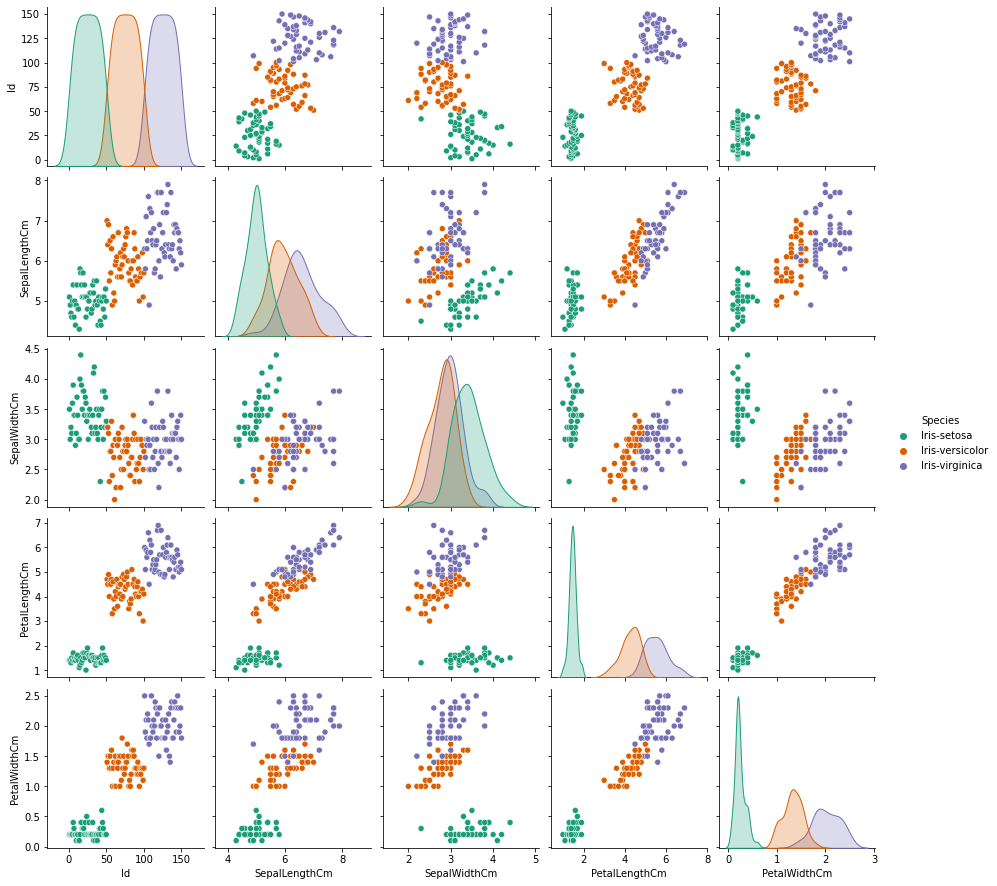

In [14]:
sns.pairplot(iris,hue='Species',palette='Dark2')

Text(0, 0.5, 'Probability Density')

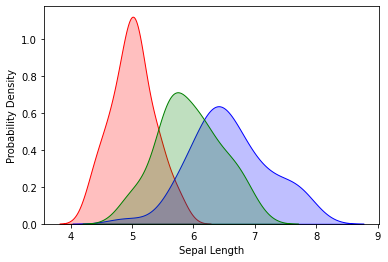

In [15]:
sns.kdeplot(iris.loc[(iris['Species']=='Iris-setosa'),
            'SepalLengthCm'], color='r', shade=True, Label='Iris_setosa')
  
sns.kdeplot(iris.loc[(iris['Species']=='Iris-virginica'), 
            'SepalLengthCm'], color='b', shade=True, Label='Iris_virginica')

sns.kdeplot(iris.loc[(iris['Species']=='Iris-versicolor'), 
            'SepalLengthCm'], color='g', shade=True, Label='Iris_versicolor')
  
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

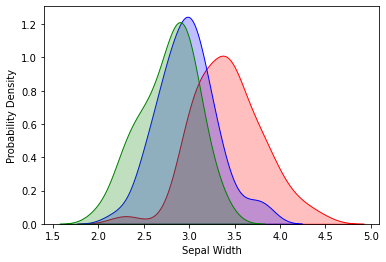

In [16]:
sns.kdeplot(iris.loc[(iris['Species']=='Iris-setosa'),
            'SepalWidthCm'], color='r', shade=True, Label='Iris_setosa')
  
sns.kdeplot(iris.loc[(iris['Species']=='Iris-virginica'), 
            'SepalWidthCm'], color='b', shade=True, Label='Iris_virginica')

sns.kdeplot(iris.loc[(iris['Species']=='Iris-versicolor'), 
            'SepalWidthCm'], color='g', shade=True, Label='Iris_versicolor')
  
plt.xlabel('Sepal Width')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

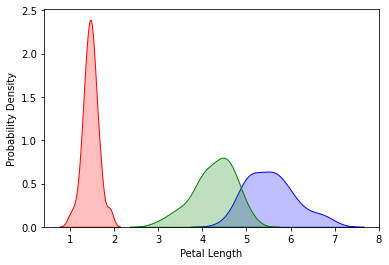

In [17]:
sns.kdeplot(iris.loc[(iris['Species']=='Iris-setosa'),
            'PetalLengthCm'], color='r', shade=True, Label='Iris_setosa')
  
sns.kdeplot(iris.loc[(iris['Species']=='Iris-virginica'), 
            'PetalLengthCm'], color='b', shade=True, Label='Iris_virginica')

sns.kdeplot(iris.loc[(iris['Species']=='Iris-versicolor'), 
            'PetalLengthCm'], color='g', shade=True, Label='Iris_versicolor')
  
plt.xlabel('Petal Length')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

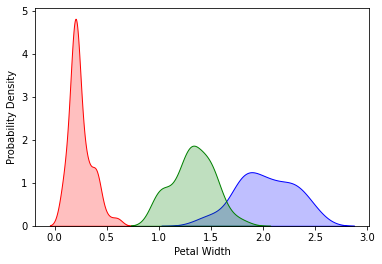

In [18]:
sns.kdeplot(iris.loc[(iris['Species']=='Iris-setosa'),
            'PetalWidthCm'], color='r', shade=True, Label='Iris_setosa')
  
sns.kdeplot(iris.loc[(iris['Species']=='Iris-virginica'), 
            'PetalWidthCm'], color='b', shade=True, Label='Iris_virginica')

sns.kdeplot(iris.loc[(iris['Species']=='Iris-versicolor'), 
            'PetalWidthCm'], color='g', shade=True, Label='Iris_versicolor')
  
plt.xlabel('Petal Width')
plt.ylabel('Probability Density')

## Observations:

- Setosa is the most seperable from the rest
- Petal width and lenght features seperate better when compared to sepal length and width

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = iris.drop('Species',axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Train a model

In [21]:
from sklearn.svm import SVC

In [22]:
svc_model = SVC()

In [23]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model Evaluation
Get predictions from model and create confusion matrix

In [24]:
predictions = svc_model.predict(X_test)

In [25]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,predictions))

[[10  0  0]
 [ 1 19  0]
 [ 0  0 15]]


In [28]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       0.91      1.00      0.95        10
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### The model looks pretty good with majority of accurate predictions

## GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

### Create a dictionary called param_grid and fill out some parameters for C and gamma.

In [30]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

### Create a GridSearchCV object and fit it to the training data.

In [31]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

With the grid model, creating some predictions using the test set and create classification reports and confusion matrices for them. 

In [32]:
grid_predictions = grid.predict(X_test)

In [33]:
print(confusion_matrix(y_test,grid_predictions))

[[10  0  0]
 [ 0 20  0]
 [ 0  0 15]]


In [34]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

